In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1=pd.read_csv('./final_mon.csv', index_col=0)

In [11]:
df1['ind_cci_shift'].loc[df1['ind_cci_shift'].isna()]

2004-10-01   NaN
2004-10-02   NaN
2004-10-03   NaN
2004-10-04   NaN
2004-10-05   NaN
              ..
2023-12-28   NaN
2023-12-29   NaN
2023-12-30   NaN
2023-12-31   NaN
2024-01-01   NaN
Name: ind_cci_shift, Length: 4049, dtype: float64

In [4]:
df2=pd.read_csv('./final_mon2.csv', index_col=0)

In [5]:
df3=pd.read_csv('./final_qua.csv', index_col=0)

In [6]:
df4=pd.read_csv('./final_ustb.csv', index_col=0)

In [7]:
# df1, df2, df3 --> merge(outer)로 합쳐서 df_total로 저장
# index : datetime형태(월, 분기, 연 --> 첫날)

dfs = [df1, df2, df3, df4]
df_total = pd.DataFrame()
for df in dfs:
    df_total = pd.merge(
        df_total, df,
        left_index=True, right_index=True,
        how='outer'
    )

In [8]:
df_total= df_total.loc['2021':'2023-07-01']

<Figure size 500x500 with 0 Axes>

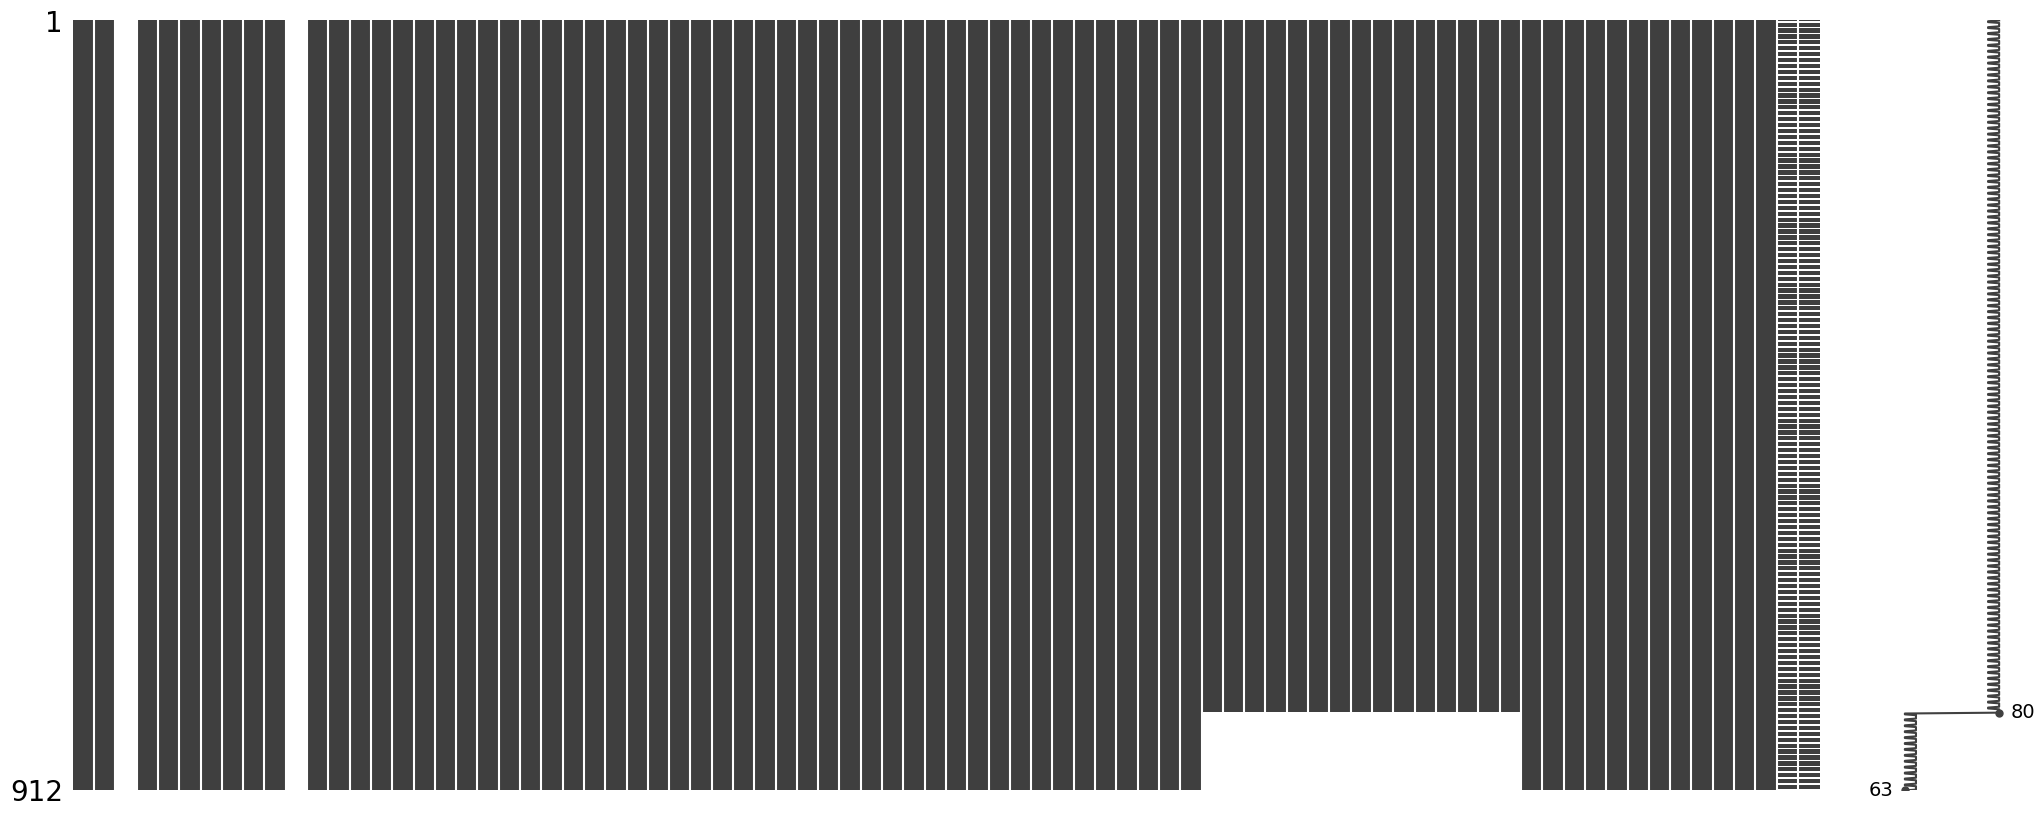

In [9]:
plt.figure(figsize=(5,5))
msno.matrix(df_total)
plt.show()

ind_cci_shift, ind_cci(%)_shift => 아예없음
2023-04-01 부터없음
'홍콩금융계좌_shift', '홍콩금융예비자산_shift',
'홍콩직접투자_shift', '홍콩직접투자자산_shift',
'홍콩직접투자부채_shift', '홍콩직접투자_shift',
'홍콩포트폴리오투자자산_shift',
'홍콩포트폴리오투자부채_shift', '홍콩파생상품_shift',
'홍콩파생상품자산_shift',
'홍콩파생상품부채_shift', '대체투자_shift',
'대체투자자산_shift', '대체투자부채_shift',
'홍콩예비자산_shift',

In [10]:
df_total['Money Supply M3 (adjusted for foreign currency swap deposits).2_shift']
# .loc[df_total['Money Supply M3 (adjusted for foreign currency swap deposits).2_shiftt'].isna()]

2021-01-01    15644043.0
2021-01-02    15644043.0
2021-01-03    15644043.0
2021-01-04    15644043.0
2021-01-05    15644043.0
                 ...    
2023-06-27    16653624.0
2023-06-28    16653624.0
2023-06-29    16653624.0
2023-06-30    16653624.0
2023-07-01    16587509.0
Name: Money Supply M3 (adjusted for foreign currency swap deposits).2_shift, Length: 912, dtype: float64

In [11]:
df_total.columns

Index(['chn_cci_shift', 'kor_cci_shift', 'ind_cci_shift', 'cpi_kor_shift',
       'cpi_chn_shift', 'cpi_ind_shift', 'cpi_jap_shift', 'cpi_usa_shift',
       'chn_cci_100기준_shift', 'kor_cci_100기준_shift', 'ind_cci_100기준_shift',
       'chn_cci(%)_shift', 'kor_cci(%)_shift', 'ind_cci(%)_shift',
       'cpi_kor(%)_shift', 'cpi_chn(%)_shift', 'cpi_ind(%)_shift',
       'cpi_jap(%)_shift', 'cpi_usa(%)_shift', '홍콩수출액', '홍콩수출액_shift',
       '홍콩수출액_shift_diff', '홍콩수입액', '홍콩수입액_shift', '홍콩수입액_shift_diff',
       '홍콩외환보유액', '홍콩외환보유액_shift', '홍콩외환보유액(%)', '홍콩CPI', '홍콩CPI_shift',
       '홍콩CPI_shift_diff()', 'Food, beverages and tobacco_shift',
       'Textiles and wearing apparel_shift',
       'Paper products, printing and reproduction of recorded media_shift',
       'Metal, computer, electronic and optical products, machinery and equipment_shift',
       'Miscellaneous manufacturing industries (1)_shift', 'HKPPI_shift',
       'Money Supply M1 (1)_shift', 'Money Supply M1 (1).1_shift',
       

In [12]:
df_total.fillna(method='ffill', inplace=True)

C:\Users\jju\AppData\Local\Temp\ipykernel_3612\2240917824.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_total.fillna(method='ffill', inplace=True)


In [13]:
df_total.columns = ['chn_cci_shift', 'kor_cci_shift', 'ind_cci_shift', 'cpi_kor_shift',
       'cpi_chn_shift', 'cpi_ind_shift', 'cpi_jap_shift', 'cpi_usa_shift',
       'chn_cci_100기준_shift', 'kor_cci_100기준_shift', 'ind_cci_100기준_shift',
       'chn_cci(%)_shift', 'kor_cci(%)_shift', 'ind_cci(%)_shift',
       'cpi_kor(%)_shift', 'cpi_chn(%)_shift', 'cpi_ind(%)_shift',
       'cpi_jap(%)_shift', 'cpi_usa(%)_shift', '홍콩수출액', '홍콩수출액_shift',
       '홍콩수출액_shift_diff', '홍콩수입액', '홍콩수입액_shift', '홍콩수입액_shift_diff',
       '홍콩외환보유액', '홍콩외환보유액_shift', '홍콩외환보유액(%)', '홍콩CPI', '홍콩CPI_shift',
       '홍콩CPI_shift_diff()', '홍콩음식료PPI_shift',
       '홍콩의류PPI_shift',
       '홍콩인쇄미디어PPI_shift',
       '홍콩기계장비PPI_shift',
       '홍콩기타제조업PPI(1)_shift', 'HKPPI_shift',
       '홍콩 M1 자국통화_shift', '홍콩 M1 외국통화.1_shift',
       '홍콩 M1 종합_shift',
       '홍콩 M1 (seasonally adjusted)_shift',
       '홍콩 M2 자국통화_shift', '홍콩 M2 외국통화.1_shift',
       '홍콩 M2 종합_shift',
       '홍콩 M2 (adjusted for foreign currency swap deposits)_shift',
       '홍콩 M2 (adjusted for foreign currency swap deposits).1_shift',
       '홍콩 M2 (adjusted for foreign currency swap deposits).2_shift',
       '홍콩 M3 자국통화_shift', '홍콩 M3 외국통화.1_shift',
       '홍콩 M3 종합_shift',
       '홍콩 M3 (adjusted for foreign currency swap deposits)_shift',
       '홍콩 M3 (adjusted for foreign currency swap deposits).1_shift',
       '홍콩 M3 (adjusted for foreign currency swap deposits).2_shift',
       '홍콩금융계좌_shift', '홍콩금융예비자산_shift',
       '홍콩직접투자_shift', '홍콩직접투자자산_shift',
       '홍콩직접투자부채_shift', '홍콩직접투자_shift',
       '홍콩포트폴리오투자자산_shift',
       '홍콩포트폴리오투자부채_shift', '홍콩파생상품_shift',
       '홍콩파생상품자산_shift',
       '홍콩파생상품부채_shift', '대체투자_shift',
       '대체투자자산_shift', '대체투자부채_shift',
       '홍콩예비자산_shift',
       '홍콩거래소시가총액_Main BoardH Shares_shift',
       '홍콩거래소시가총액_Main Board_Others_shift',
       '홍콩거래소시가총액_Main Board_Sub-total_shift',
       '일일증권평균거래량_Main Board_Other equity stocks_shift',
       '일일증권평균거래량_Main Board_Other listed securities_shift',
       '일일증권평균거래량_Main Board_Sub-total_shift',
       '홍콩 M2 (2).1(%)_shift', '홍콩직접투자(%)_shift',
       '홍콩직접투자(%)_shift', '홍콩파생상품(%)_shift',
       '일일증권평균거래량_Main Board_Other equity stocks(%)_shift',
       '홍콩거래소시가총액_Main BoardH Shares(%)_shift', '국채 수익률',
       '국채 수익률증감']

In [14]:
df_total.to_csv('./final_total_2021.csv')

In [15]:
# cols_rename = {
#     'Food, beverages and tobacco_shift' : '홍콩음식료PPI_shift',
#     'Textiles and wearing apparel_shift' : '홍콩의류PPI_shift',
#     'Paper products, printing and reproduction of recorded media_shift' : '홍콩인쇄미디어PPI_shift',
#     'machinery and equipment_shift' : '홍콩기계장비PPI_shift',
#     'Miscellaneous manufacturing industries (1)_shift' :'홍콩기타제조업PPI_shift',
#     'Money Supply M2 (2)_shift' : '홍콩자국통화M2_shift',
#     'Money Supply M2 (2).1_shift' : '홍콩외국통화M2_shift',
#     'Money Supply M2 (2).2_shift' : '홍콩종합통화M2_shift',
#     'Money Supply M2 (2).2_shift' : '홍콩종합통화M2_shift',


#     ...
# }

# df_total.rename(columns = cols_rename, inplace=True)